In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import math
import warnings

from IPython.display import display
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [28]:
df = pd.read_csv('C:\\Users\\STEVEN\\Documents\\Thinkful\\new_york.csv')

In [29]:
print(df.head(1))


            City Population Violent\ncrime  \
0  Adams Village      1,861              0   

   Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1  \
0                                   0.000                           nan   

  Rape\n(legacy\ndefinition)2 Robbery Aggravated\nassault Property\ncrime  \
0                           0       0                   0              12   

  Burglary Larceny-\ntheft Motor\nvehicle\ntheft  Arson3  Unnamed: 13  
0        2              10                     0   0.000          nan  


In [30]:
df.shape[0]

351

In [31]:
print(df.loc[0,:])

City                                      Adams Village
Population                                        1,861
Violent\ncrime                                        0
Murder and\nnonnegligent\nmanslaughter            0.000
Rape\n(revised\ndefinition)1                        NaN
Rape\n(legacy\ndefinition)2                           0
Robbery                                               0
Aggravated\nassault                                   0
Property\ncrime                                      12
Burglary                                              2
Larceny-\ntheft                                      10
Motor\nvehicle\ntheft                                 0
Arson3                                            0.000
Unnamed: 13                                         NaN
Name: 0, dtype: object


In [32]:
#fill in all missing datas with 0

df = df.fillna(0)
print(df.loc[0,:])

City                                      Adams Village
Population                                        1,861
Violent\ncrime                                        0
Murder and\nnonnegligent\nmanslaughter            0.000
Rape\n(revised\ndefinition)1                      0.000
Rape\n(legacy\ndefinition)2                           0
Robbery                                               0
Aggravated\nassault                                   0
Property\ncrime                                      12
Burglary                                              2
Larceny-\ntheft                                      10
Motor\nvehicle\ntheft                                 0
Arson3                                            0.000
Unnamed: 13                                       0.000
Name: 0, dtype: object


In [33]:
#lets create some features

df['Population'] = df['Population'].str.replace(',', '')
df = df.fillna(0)
df['Population'] = df['Population'].astype(int)

In [34]:
df['Population_sq'] = np.square(df['Population'])

In [35]:
#messing with cat. for murder
df = df.rename(index=str,columns={'Murder and\nnonnegligent\nmanslaughter': 'Murder'})
df['Murder'] = df['Murder'].astype(int)

murder_ca = []

for x in df['Murder']:
    if x == 0: 
        murder_ca.append(x)
    else: 
        x = 1
        murder_ca.append(x)


se = pd.Series(murder_ca)
df['murder_cat'] = se.values
#df['Murder']

In [36]:
from sklearn import preprocessing
#Robbery now
df['Robbery'] = df['Robbery'].str.replace(',', '')
df = df.fillna(0)
df['Robbery'] = df['Robbery'].astype(int)

robbery_ca = []

for x in df['Robbery']:
    if x == 0: 
        robbery_ca.append(x)
    elif x > 0: 
        x = 1
        robbery_ca.append(x)

se = pd.Series(robbery_ca)
df['robbery_cat'] = se.values
#print(robbery_ca)

df['robbery_cat2'] = df['Robbery'].apply(lambda x: 0 if x == 0 else 1)




In [37]:
test = df[['Population'] + ['Population_sq'] + ['murder_cat'] + ['robbery_cat']]

In [38]:
#Cleaning up property crime: 
df['Property\ncrime'] = df['Property\ncrime'].str.replace(',', '')
df = df.fillna(0)
df['Property\ncrime'] = df['Property\ncrime'].astype(int)

In [39]:
#Creating the regression analysis:
regr = linear_model.LinearRegression()
Y = df['Property\ncrime']
X = test
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 1.69008489e-02 -1.74015373e-07  6.15485365e+02  1.47795726e+02]

Intercept: 
 -24.850723319938652

R-squared:
0.9935844589734969


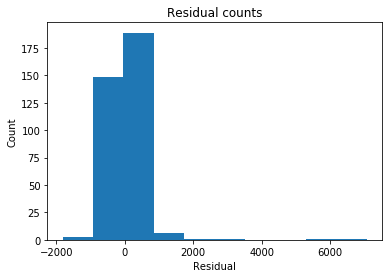

In [40]:
predicted = regr.predict(X).ravel()
actual = df['Property\ncrime']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

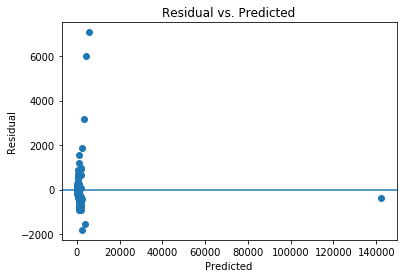

In [41]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [42]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Population_sq,murder_cat,robbery_cat
Population,1.000,0.155,0.162,0.065
Population_sq,0.155,1.000,0.122,0.239
murder_cat,0.162,0.122,1.000,0.315
robbery_cat,0.065,0.239,0.315,1.000


In [44]:
print(df['Property\ncrime'].max())

141971


In [45]:
print(df[df['Property\ncrime'] == 141971])

         City  Population Violent\ncrime  Murder  \
216  New York     8396126         52,384     335   

     Rape\n(revised\ndefinition)1 Rape\n(legacy\ndefinition)2  Robbery  \
216                         0.000                       1,112    19170   

    Aggravated\nassault  Property\ncrime Burglary Larceny-\ntheft  \
216              31,767           141971   16,606         117,931   

    Motor\nvehicle\ntheft  Arson3  Unnamed: 13  Population_sq  murder_cat  \
216                 7,434   0.000        0.000     1633578628           1   

     robbery_cat  robbery_cat2  
216            1             1  


I chose to just run with the basic features that thinkful already prescribes.

It seems to predict the data very well with a very large amount of confidence.  None of the features necessary dictate or highly correlate with the each other, besides our categorical columns which makes sense.  

One interesting thing is the fair amount of accuracy that it was able to predict New York City.  This is most likely due to the population and population squared features.  Population squared is interesting in the idea that as population increases murder shouls also increase at an exponential rate.  

There are some areas where my module predicted to little crime for an area.  This occurence was more likely than predicting to much crime.  